In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
file = "CSVs/Average_Daily_Traffic_Counts.csv"
traffic_df = pd.read_csv(file)
traffic_df.head()

,ID,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location
0,2,1708 West,71st Street,03/09/2006,14600,East Bound: 6900 / West Bound: 7700,41.764877,-87.666635,"(41.764877, -87.666635)"
1,3,1275 West,71st Street,02/28/2006,16500,East Bound: 7800 / West Bound: 8700,41.765008,-87.657067,"(41.765008, -87.657067)"
2,5,920 West,71st Street,02/28/2006,18200,East Bound: 8800 / West Bound: 9400,41.765153,-87.647751,"(41.765153, -87.647751)"
3,6,758 West,71st Street,02/28/2006,21600,East Bound: 10400 / West Bound: 11200,41.765204,-87.644371,"(41.765204, -87.644371)"
4,7,240 East,71st St,02/28/2006,18300,East Bound: 9000 / West Bound: 9300,41.765644,-87.618476,"(41.765644, -87.618476)"


In [7]:
file3 = "CSVs/Chicago_Traffic_Tracker_-_Congestion_Estimates_by_Regions.csv"
regions_df = pd.read_csv(file3)

In [8]:
traffic_df["REGION ID"] = ""

for index, row in traffic_df.iterrows():
    for index2, row2 in regions_df.iterrows():
        if (traffic_df["Latitude"][index] < regions_df[" NORTH"][index2]) & (traffic_df["Latitude"][index] > regions_df[" SOUTH"][index2]) & (traffic_df["Longitude"][index] > regions_df[" WEST"][index2]) & (traffic_df["Longitude"][index]< regions_df[" EAST"][index2]):
            traffic_df["REGION ID"][index] = regions_df[" REGION_ID"][index2]

C:\Users\Caitlin\Anaconda3\envs\DataClass\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
traffic_df.head()

,ID,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location,REGION ID
0,2,1708 West,71st Street,03/09/2006,14600,East Bound: 6900 / West Bound: 7700,41.764877,-87.666635,"(41.764877, -87.666635)",19
1,3,1275 West,71st Street,02/28/2006,16500,East Bound: 7800 / West Bound: 8700,41.765008,-87.657067,"(41.765008, -87.657067)",19
2,5,920 West,71st Street,02/28/2006,18200,East Bound: 8800 / West Bound: 9400,41.765153,-87.647751,"(41.765153, -87.647751)",19
3,6,758 West,71st Street,02/28/2006,21600,East Bound: 10400 / West Bound: 11200,41.765204,-87.644371,"(41.765204, -87.644371)",19
4,7,240 East,71st St,02/28/2006,18300,East Bound: 9000 / West Bound: 9300,41.765644,-87.618476,"(41.765644, -87.618476)",20


In [16]:
traffic_df= traffic_df[["REGION ID", "Total Passing Vehicle Volume"]]

In [18]:
traffic_gb = traffic_df.groupby(["REGION ID"])
traffic_gb.sum()

,Total Passing Vehicle Volume
REGION ID,
1,102400
2,1003900
3,812400
4,475000
5,1552700
6,1099300
7,1010400
8,899600
9,378300


In [23]:
traffic_simplified = pd.DataFrame({"Region ID" : traffic_df["REGION ID"].unique(), "Vehicle Volume" : traffic_gb["Total Passing Vehicle Volume"].sum()})
traffic_simplified.head()

,Region ID,Vehicle Volume
REGION ID,,
1,19,102400
2,20,1003900
3,21,812400
4,24,475000
5,27,1552700


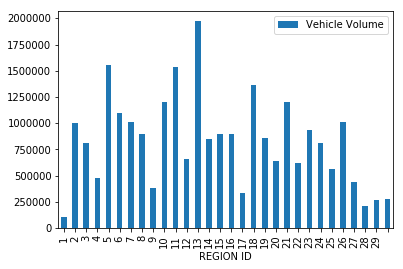

In [26]:
traffic_simplified.plot(kind = "bar")